# Artificial Neural Networks and Deep Learning

---

## Lecture 1: Feedforward Neural Networks

### 🌐 Connect Colab to Google Drive

In [10]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Lecture 1

ModuleNotFoundError: No module named 'google.colab'

### ⚙️ Import Libraries

In [37]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=14)
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

TensorFlow version 2.18.0


### ⏳ Load Data

In [38]:
# Load the Iris dataset into a variable called 'data'
data = load_iris()

# Print the description of the Iris dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

<img src="https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png" width="800">

### 🔎 Inspect Data

In [39]:
# Create a DataFrame 'iris_dataset' from the Iris dataset
iris_dataset = pd.DataFrame(data.data, columns=data.feature_names)
print('Iris dataset shape', iris_dataset.shape)

# Display the first 10 rows of the Iris dataset
iris_dataset.head(10)

Iris dataset shape (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [40]:
# Print the shape of the Iris dataset
print('Iris dataset shape', iris_dataset.shape)

# Generate summary statistics for the Iris dataset
iris_dataset.describe()

Iris dataset shape (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
# Get the target values from the Iris dataset
target = data.target
print('Target shape', target.shape)


# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (150,)
Target labels: [0 1 2]
Class 0 has 50 samples
Class 1 has 50 samples
Class 2 has 50 samples


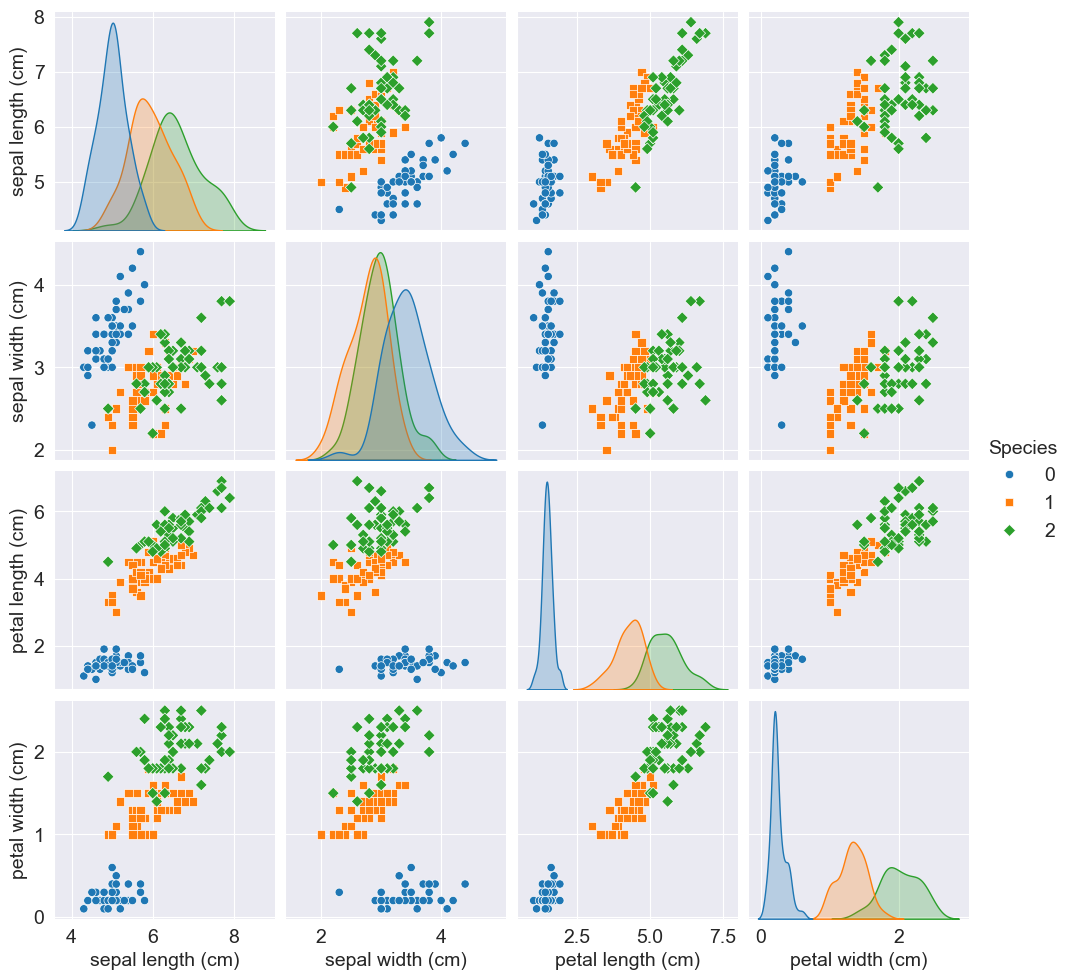

In [42]:
# Copy the iris dataset
plot_dataset = iris_dataset.copy()

# Assign target labels to the dataset
plot_dataset["Species"] = target

# Plot using seaborn pairplot
sns.pairplot(plot_dataset, hue="Species", palette="tab10", markers=["o", "s", "D"])
plt.show()

# Clean up by deleting the temporary dataset
del plot_dataset

#### Split in train, validation and test

In [43]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    iris_dataset,
    target,
    test_size=20,
    random_state=seed,
    stratify=target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=20,
    random_state=seed,
    stratify=y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t', X_train.shape, y_train.shape)
print('Validation set shape:\t', X_val.shape, y_val.shape)
print('Test set shape:\t\t', X_test.shape, y_test.shape)

Training set shape:	 (110, 4) (110,)
Validation set shape:	 (20, 4) (20,)
Test set shape:		 (20, 4) (20,)


### 🔄 Process Data

In [44]:
# Compute maximum values for each feature
max_df = X_train.max()

# Display maximum values
print('Iris dataset maximum values')
print(max_df)

# Compute minimum values for each feature
min_df = X_train.min()

# Display minimum values
print('\nIris dataset minimum values')
print(min_df)

Iris dataset maximum values
sepal length (cm)    7.7
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Iris dataset minimum values
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64


In [45]:
# Normalise training data
X_train = (X_train - min_df) / (max_df - min_df)

# Normalise validation data
X_val = (X_val - min_df) / (max_df - min_df)

# Normalise test data
X_test = (X_test - min_df) / (max_df - min_df)

In [46]:
# Display summary statistics of the normalised training data
X_train.describe()
X_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [47]:
# Apply one-hot encoding to training labels
y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))

# Apply one-hot encoding to validation labels
y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))

# Apply one-hot encoding to test labels
y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))

# Display shapes of the encoded label sets
print('Training set target shape:\t', y_train.shape)
print('Validation set target shape:\t', y_val.shape)
print('Test set target shape:\t\t', y_test.shape)

Training set target shape:	 (110, 3)
Validation set target shape:	 (20, 3)
Test set target shape:		 (20, 3)


In [48]:
# Determine the input shape, corresponding to the number of features
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape, corresponding to the number of classes
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (4,)
Output shape of the network 3


### 🧮 Define Network Parameters

In [49]:
# Batch size: number of samples processed in each training iteration
batch_size = 16

# Number of epochs: times the entire dataset is passed through the network during training
epochs = 500

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

### 🛠️ Build the Model

In [50]:
def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    inputs = tfkl.Input(shape=input_shape, name='Input')

    # Add hidden layer with ReLU activation
    x = tfkl.Dense(units=16, name='Hidden')(inputs)
    x = tfkl.Activation('relu', name='HiddenActivation')(x)

    # Add output layer with softmax activation
    x = tfkl.Dense(units=output_shape, name='Output')(x)
    outputs = tfkl.Activation('softmax', name='Softmax')(x)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=inputs, outputs=outputs, name='FeedforwardNeuralNetwork')

    # Compile the model with loss, optimizer, and metrics
    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

In [51]:
# Build the model with specified input and output shapes
model = build_model()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Input (InputLayer)          │ (None, 4)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden (Dense)              │ (None, 16)            │         80 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ HiddenActivation            │ (None, 16)            │          0 │   -   │
│ (Activation)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Output (Dense)              │ (None, 3)             │         51 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Softmax (Activation)        │ (None, 3)             │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### 🧠 Train the Model

In [52]:
# Train the model and store the training history
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
).history

# Calculate the final validation accuracy
final_val_accuracy = round(history['val_accuracy'][-1] * 100, 2)

# Save the trained model to a file with the accuracy included in the filename
model_filename = f'Iris_Feedforward_{final_val_accuracy}.keras'
model.save(model_filename)

# Delete the model to free up memory resources
del model

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3153 - loss: 1.0700 - val_accuracy: 0.3000 - val_loss: 1.0597
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3153 - loss: 1.0568 - val_accuracy: 0.3000 - val_loss: 1.0470
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3474 - loss: 1.0441 - val_accuracy: 0.3500 - val_loss: 1.0342
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3648 - loss: 1.0311 - val_accuracy: 0.4500 - val_loss: 1.0215
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5111 - loss: 1.0176 - val_accuracy: 0.6000 - val_loss: 1.0077
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6289 - loss: 1.0028 - val_accuracy: 0.6500 - val_loss: 0.9932
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6522 - loss: 0.9871 - val_accuracy: 0.6500 - val_loss: 0.9785
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6522 - loss: 0.9713 - val_accuracy: 0.6500 - val_loss: 0.9646

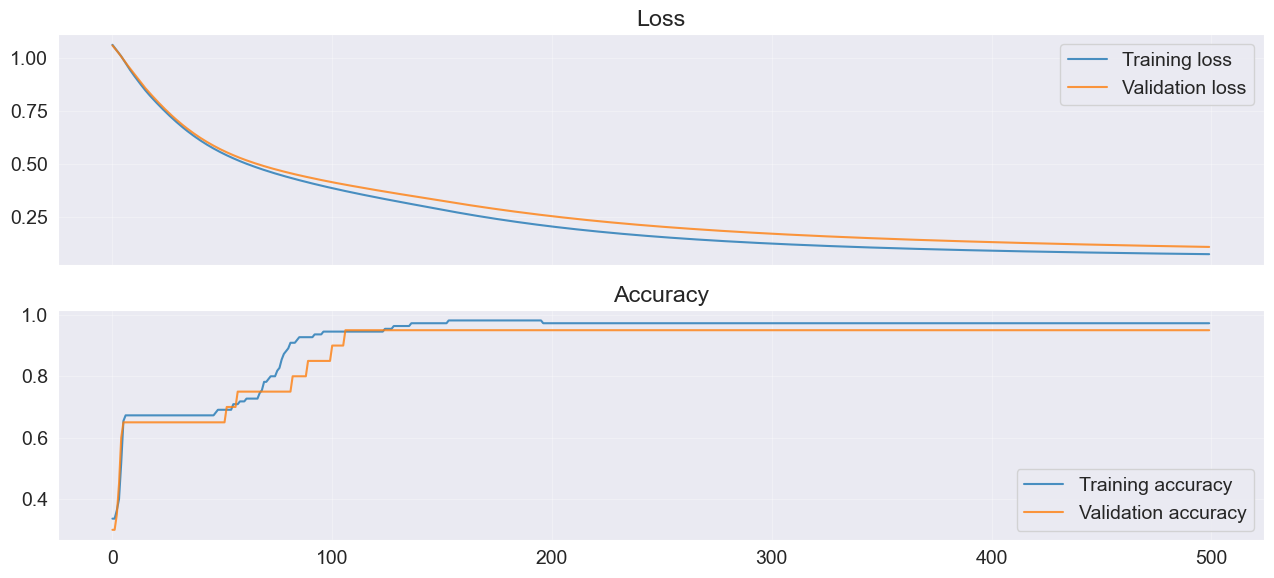

In [53]:
# Create a figure with two vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharex=True)

# Plot training and validation loss
ax1.plot(history['loss'], label='Training loss', alpha=.8)
ax1.plot(history['val_loss'], label='Validation loss', alpha=.8)
ax1.set_title('Loss')
ax1.legend()
ax1.grid(alpha=.3)

# Plot training and validation accuracy
ax2.plot(history['accuracy'], label='Training accuracy', alpha=.8)
ax2.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
ax2.set_title('Accuracy')
ax2.legend()
ax2.grid(alpha=.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

### 🕹️ Use the Model - Make Inference

**Binary Classification Metrics**

<img src="https://drive.google.com/uc?export=view&id=1dUVBtRp6yJmfr1-cwUmWtKX2UfgozNaj" width="250"/>

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

&nbsp;

---

**Multiclass Classification Metrics**

<img src="https://drive.google.com/uc?export=view&id=1yDfrbcjHPTqFx9P5ZPhi07S5XVcXjd6g" width="300"/>

$\text{Accuracy} = \sum_{i=1}^{N} \frac{TP_i}{TP_i + TN_i + FP_i + FN_i}$

$\text{Precision}_i = \frac{TP_i}{TP_i + FP_i}$

$\text{Recall}_i = \frac{TP_i}{TP_i + FN_i}$

$F1_i = 2 \cdot \frac{\text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$

&nbsp;

**Macro Averaging**

$\text{Precision}_{macro} = \frac{1}{N} \sum_{i=1}^{N} \text{Precision}_i$

$\text{Recall}_{macro} = \frac{1}{N} \sum_{i=1}^{N} \text{Recall}_i$

$F1_{macro} = \frac{1}{N} \sum_{i=1}^{N} F1_i$

&nbsp;

**Weighted Macro Averaging**

$\text{Precision}_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times \text{Precision}_i \right)$

$\text{Recall}_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times \text{Recall}_i \right)$

$F1_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times F1_i \right)$


In [54]:
# Load the saved model
model = tfk.models.load_model('Iris_Feedforward_95.0.keras')

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Input (InputLayer)          │ (None, 4)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden (Dense)              │ (None, 16)            │         80 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ HiddenActivation            │ (None, 16)            │          0 │   -   │
│ (Activation)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Output (Dense)              │ (None, 3)             │         51 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Softmax (Activation)        │ (None, 3)             │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Accuracy score over the train set: 0.9727
Precision score over the train set: 0.9729
Recall score over the train set: 0.9727
F1 score over the train set: 0.9727


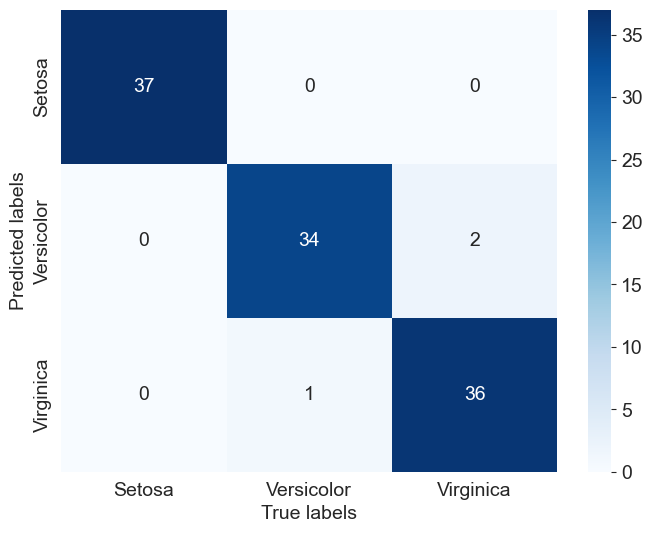

In [55]:
# Predict class probabilities and get predicted classes
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions, axis=-1)

# Extract ground truth classes
train_gt = np.argmax(y_train, axis=-1)

# Calculate and display training set accuracy
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy, 4)}')

# Calculate and display training set precision
train_precision = precision_score(train_gt, train_predictions, average='weighted')
print(f'Precision score over the train set: {round(train_precision, 4)}')

# Calculate and display training set recall
train_recall = recall_score(train_gt, train_predictions, average='weighted')
print(f'Recall score over the train set: {round(train_recall, 4)}')

# Calculate and display training set F1 score
train_f1 = f1_score(train_gt, train_predictions, average='weighted')
print(f'F1 score over the train set: {round(train_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(train_gt, train_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the validation set: 0.95
Precision score over the validation set: 0.9571
Recall score over the validation set: 0.95
F1 score over the validation set: 0.95


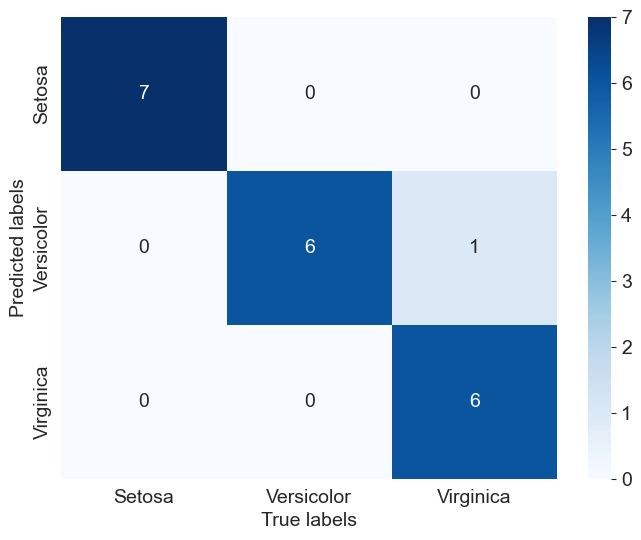

In [56]:
# Predict class probabilities and get predicted classes
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

# Extract ground truth classes
val_gt = np.argmax(y_val, axis=-1)

# Calculate and display validation set accuracy
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

# Calculate and display validation set precision
val_precision = precision_score(val_gt, val_predictions, average='weighted')
print(f'Precision score over the validation set: {round(val_precision, 4)}')

# Calculate and display validation set recall
val_recall = recall_score(val_gt, val_predictions, average='weighted')
print(f'Recall score over the validation set: {round(val_recall, 4)}')

# Calculate and display validation set F1 score
val_f1 = f1_score(val_gt, val_predictions, average='weighted')
print(f'F1 score over the validation set: {round(val_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(val_gt, val_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the test set: 0.95
Precision score over the test set: 0.9562
Recall score over the test set: 0.95
F1 score over the test set: 0.9497


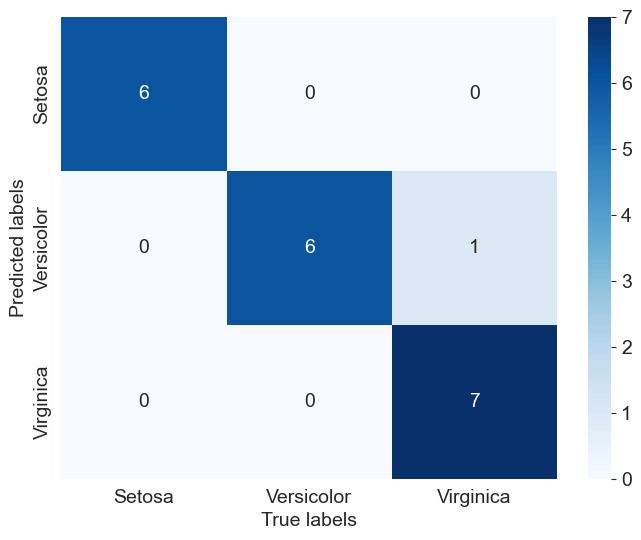

In [57]:
# Predict class probabilities and get predicted classes
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

# Extract ground truth classes
test_gt = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

# Calculate and display test set precision
test_precision = precision_score(test_gt, test_predictions, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')

# Calculate and display test set recall
test_recall = recall_score(test_gt, test_predictions, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')

# Calculate and display test set F1 score
test_f1 = f1_score(test_gt, test_predictions, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(test_gt, test_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

### 📜 TODO Exercise
Perform the same classification analysis on the Penguins dataset to predict the correct species

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="800">

```
...

# Load Data
os.environ["DATASET_NAME"] = "penguins.csv"
os.environ["DATASET_URL"] = "1qn1P6_KW08wGRfSkTlzBoDCyVb18T3Lk"
if not os.path.exists(os.environ["DATASET_NAME"]):
    print("Downloading data...")
    ! gdown -q ${DATASET_URL}
    print("Download completed")
else:
    print("Data already downloaded. Using cached data...")
dataset = pd.read_csv('penguins.csv')

# Inspect Data
...

# Process Data
...


# Build the Model
...

# Train the Model
...

# Use the Model - Make Inferece
...

```



In [59]:
os.environ["DATASET_NAME"] = "penguins.csv"
os.environ["DATASET_URL"] = "1qn1P6_KW08wGRfSkTlzBoDCyVb18T3Lk"
if not os.path.exists(os.environ["DATASET_NAME"]):
    print("Downloading data...")
    ! gdown -q ${DATASET_URL}
    print("Download completed")
else:
    print("Data already downloaded. Using cached data...")
dataset = pd.read_csv('Lecture 1/penguins.csv')

Data already downloaded. Using cached data...


In [60]:
print('Penguin dataset shape', dataset.shape)
dataset.head(10)

Penguin dataset shape (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [61]:
dataset.dropna(inplace=True)
dataset.describe()
dataset.dtypes
print('Penguin dataset shape', dataset.shape)


Penguin dataset shape (333, 7)


In [62]:
!pip install scikit-learn
# Import the necessary library
from sklearn.preprocessing import LabelEncoder
target = dataset.species
enc = LabelEncoder()
target = enc.fit_transform(target)
dataset.sex = enc.fit_transform(dataset.sex)
dataset.island = enc.fit_transform(dataset.island)
print('Target shape', target.shape)


unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for u in range(0,len(unique)):
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (333,)
Target labels: [0 1 2]
Class 0 has 146 samples
Class 1 has 68 samples
Class 2 has 119 samples



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1
6,Adelie,2,38.9,17.8,181.0,3625.0,0
7,Adelie,2,39.2,19.6,195.0,4675.0,1
12,Adelie,2,41.1,17.6,182.0,3200.0,0
13,Adelie,2,38.6,21.2,191.0,3800.0,1
14,Adelie,2,34.6,21.1,198.0,4400.0,1


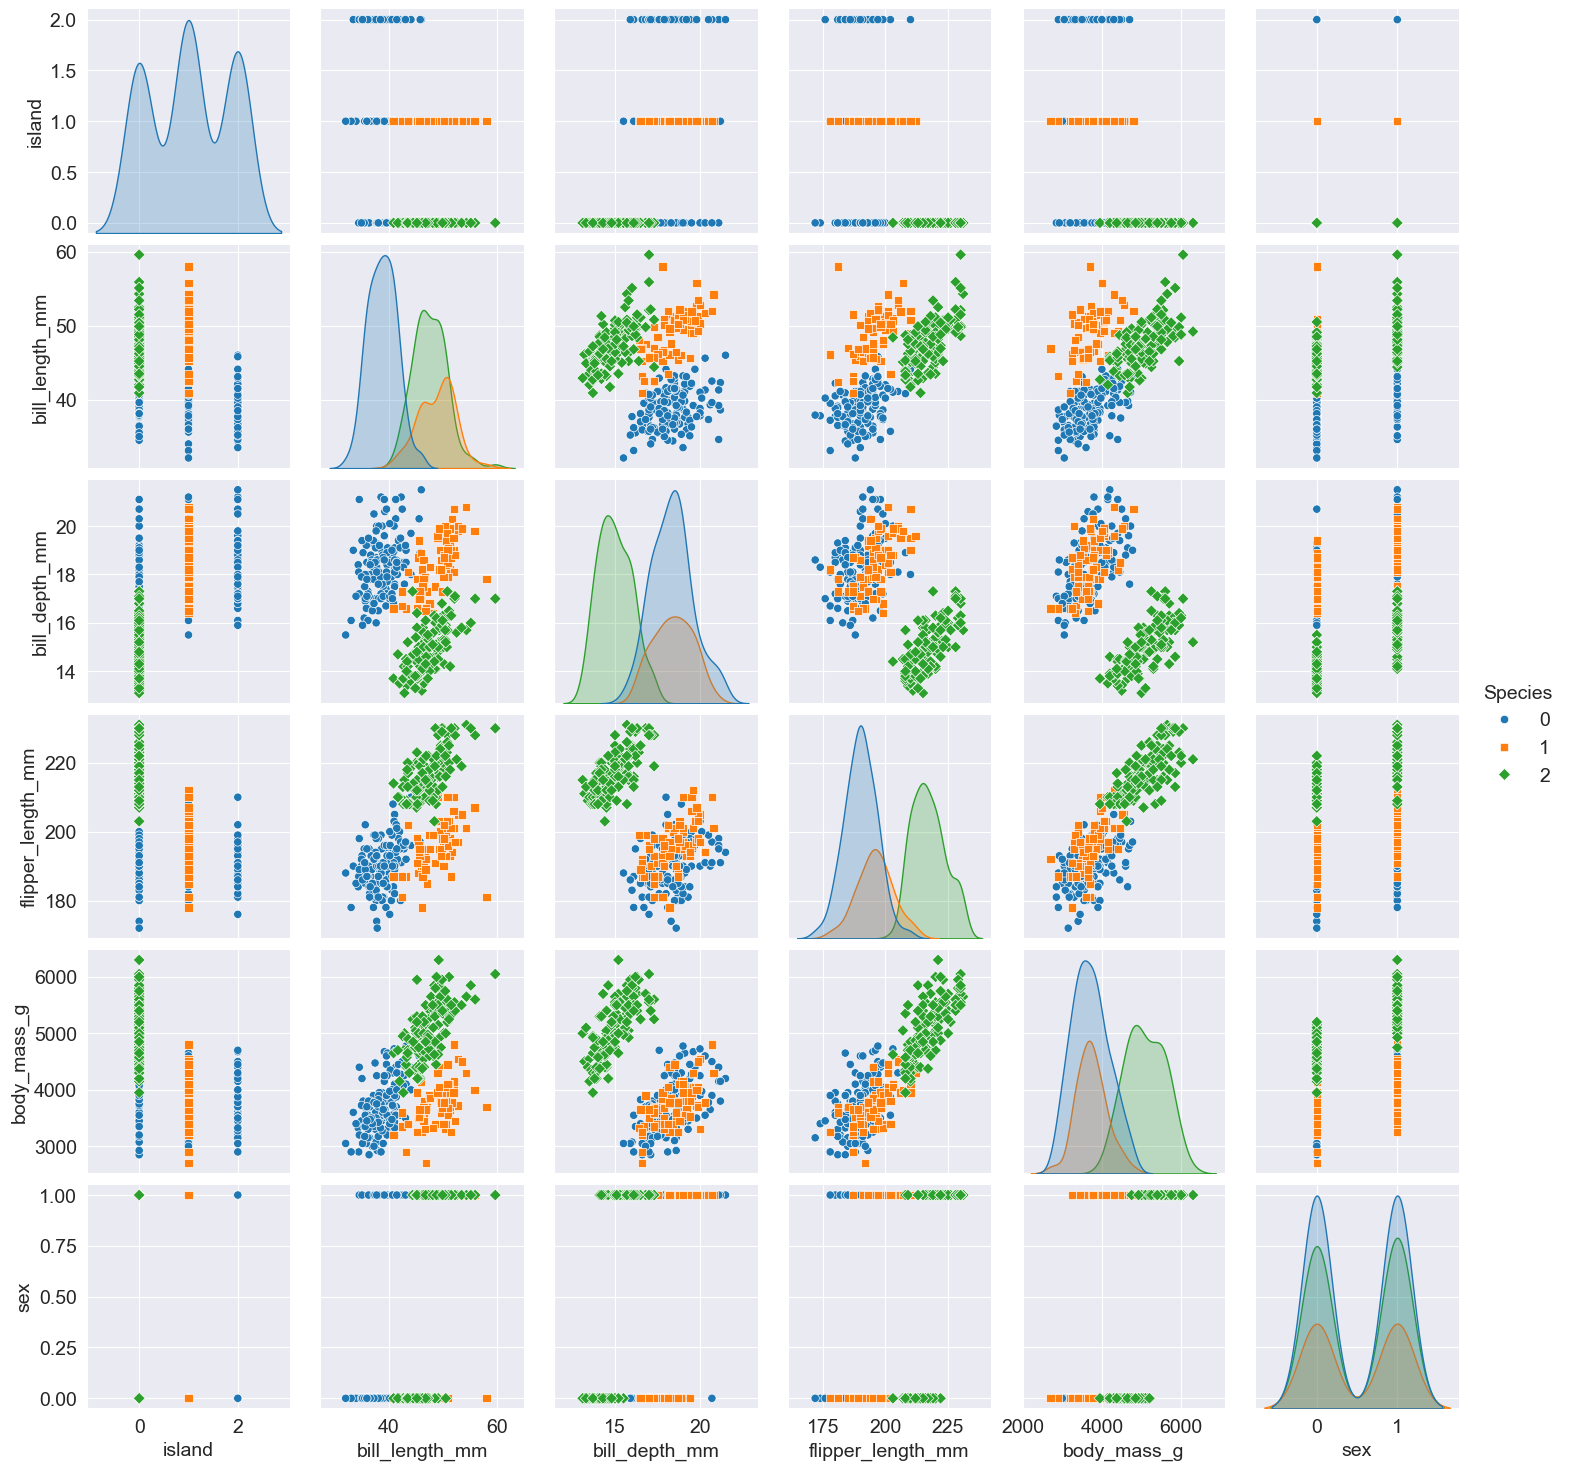

In [64]:
plot_dataset = dataset.copy()
plot_dataset["Species"] = target
sns.pairplot(plot_dataset, hue="Species", palette="tab10", markers=["o", "s", "D"])
plt.show()
del plot_dataset

In [65]:
#dataset.drop(columns=['species'], inplace=True)
X_train_val, X_test, y_train_val, y_test = train_test_split(   # test split
    dataset,
    target,
    test_size=20,
    random_state=seed,
    stratify=target
)

X_train, X_val, y_train, y_val = train_test_split(   # validation split
    X_train_val,
    y_train_val,
    test_size=40,
    random_state=seed,
    stratify=y_train_val
)

X_train.drop(columns=['species'], inplace=True)
X_val.drop(columns=['species'], inplace=True)
X_test.drop(columns=['species'], inplace=True)


print('Training set shape:\t', X_train.shape, y_train.shape)
print('Validation set shape:\t', X_val.shape, y_val.shape)
print('Test set shape:\t\t', X_test.shape, y_test.shape)

Training set shape:	 (273, 6) (273,)
Validation set shape:	 (40, 6) (40,)
Test set shape:		 (20, 6) (20,)


In [66]:
max_df = X_train.max()

print('Penguin dataset maximum values')
print(max_df)
min_df = X_train.min()

print('\nPenguin dataset minimum values')
print(min_df)

Penguin dataset maximum values
island                  2.0
bill_length_mm         59.6
bill_depth_mm          21.2
flipper_length_mm     231.0
body_mass_g          6300.0
sex                     1.0
dtype: float64

Penguin dataset minimum values
island                  0.0
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                     0.0
dtype: float64


In [67]:
X_train.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,0.644689,43.984982,17.193407,201.355311,4229.395604,0.512821
std,0.713666,5.501219,1.980835,14.181405,823.399127,0.500754
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,39.200000,15.700000,190.000000,3575.000000,0.000000
50%,1.000000,44.400000,17.300000,197.000000,4050.000000,1.000000
75%,1.000000,49.000000,18.700000,214.000000,4800.000000,1.000000
max,2.000000,59.600000,21.200000,231.000000,6300.000000,1.000000


In [68]:
num_feat = []
for col in dataset.columns:
    if dataset[col].dtype == 'float64':
        num_feat.append(col)
print(num_feat)


X_train[num_feat] = (X_train[num_feat] - min_df[num_feat]) / (max_df[num_feat] - min_df[num_feat])

X_val[num_feat] = (X_val[num_feat] - min_df[num_feat]) / (max_df[num_feat] - min_df[num_feat])

X_test[num_feat] = (X_test[num_feat] - min_df[num_feat]) / (max_df[num_feat] - min_df[num_feat])

X_train.describe()






['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,0.644689,0.432181,0.505359,0.497548,0.424832,0.512821
std,0.713666,0.200044,0.244548,0.240363,0.228722,0.500754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.258182,0.320988,0.305085,0.243056,0.000000
50%,1.000000,0.447273,0.518519,0.423729,0.375000,1.000000
75%,1.000000,0.614545,0.691358,0.711864,0.583333,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))

y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))

y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))

print('Training set target shape:\t', y_train.shape)
print('Validation set target shape:\t', y_val.shape)
print('Test set target shape:\t\t', y_test.shape)


Training set target shape:	 (273, 3)
Validation set target shape:	 (40, 3)
Test set target shape:		 (20, 3)


In [70]:
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (6,)
Output shape of the network 3


In [71]:
batch_size = 16

epochs = 300

learning_rate = 0.001

In [72]:
def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    inputs = tfkl.Input(shape=input_shape, name='Input')

    # Add hidden layer with ReLU activation
    x = tfkl.Dense(units=16, name='Hidden')(inputs)
    x = tfkl.Activation('relu', name='HiddenActivation')(x)

    # Add output layer with softmax activation
    x = tfkl.Dense(units=output_shape, name='Output')(x)
    outputs = tfkl.Activation('softmax', name='Softmax')(x)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=inputs, outputs=outputs, name='FeedforwardNeuralNetwork')

    # Compile the model with loss, optimizer, and metrics
    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

In [73]:
# Build the model with specified input and output shapes
model = build_model()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Input (InputLayer)          │ (None, 6)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden (Dense)              │ (None, 16)            │        112 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ HiddenActivation            │ (None, 16)            │          0 │   -   │
│ (Activation)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Output (Dense)              │ (None, 3)             │         51 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Softmax (Activation)        │ (None, 3)             │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [74]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
).history

# Calculate the final validation accuracy
final_val_accuracy = round(history['val_accuracy'][-1] * 100, 2)

# Save the trained model to a file with the accuracy included in the filename
model_filename = f'Penguin_Feedforward_{final_val_accuracy}.keras'
model.save(model_filename)

# Delete the model to free up memory resources
del model

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5087 - loss: 1.0343 - val_accuracy: 0.6750 - val_loss: 0.9923
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.9740 - val_accuracy: 0.7250 - val_loss: 0.9393
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.9241 - val_accuracy: 0.7250 - val_loss: 0.8942
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.8800 - val_accuracy: 0.7250 - val_loss: 0.8504
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7186 - loss: 0.8386 - val_accuracy: 0.7250 - val_loss: 0.8121
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7230 - loss: 0.8013 - val_accuracy: 0.7500 - val_loss: 0.7787
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7486 - loss: 0.7684 - val_accuracy: 0.7500 - val_loss: 0.7489
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.7383 - val_accuracy: 0.7750 - 

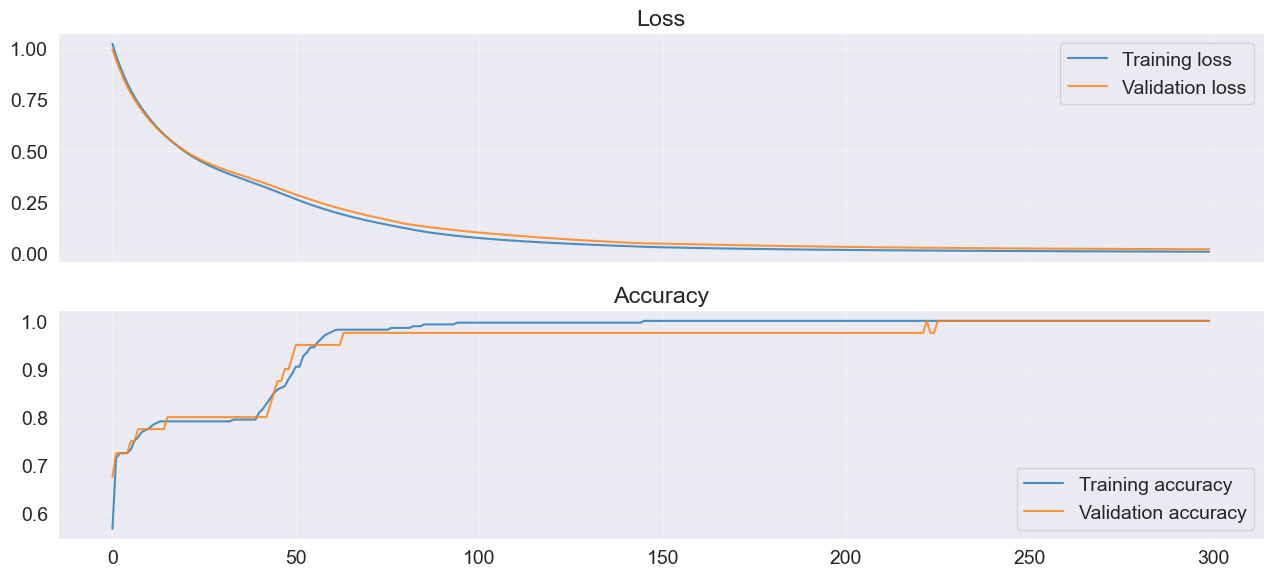

In [75]:
# Create a figure with two vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharex=True)

# Plot training and validation loss
ax1.plot(history['loss'], label='Training loss', alpha=.8)
ax1.plot(history['val_loss'], label='Validation loss', alpha=.8)
ax1.set_title('Loss')
ax1.legend()
ax1.grid(alpha=.3)

# Plot training and validation accuracy
ax2.plot(history['accuracy'], label='Training accuracy', alpha=.8)
ax2.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
ax2.set_title('Accuracy')
ax2.legend()
ax2.grid(alpha=.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

In [76]:
model = tfk.models.load_model('Penguin_Feedforward_100.0.keras')

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ Input (InputLayer)          │ (None, 6)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Hidden (Dense)              │ (None, 16)            │        112 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ HiddenActivation            │ (None, 16)            │          0 │   -   │
│ (Activation)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Output (Dense)              │ (None, 3)             │         51 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ Softmax (Activation)        │ (None, 3)             │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 491 (1.92 KB)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 328 (1.29 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Accuracy score over the train set: 1.0
Precision score over the train set: 1.0
Recall score over the train set: 1.0
F1 score over the train set: 1.0


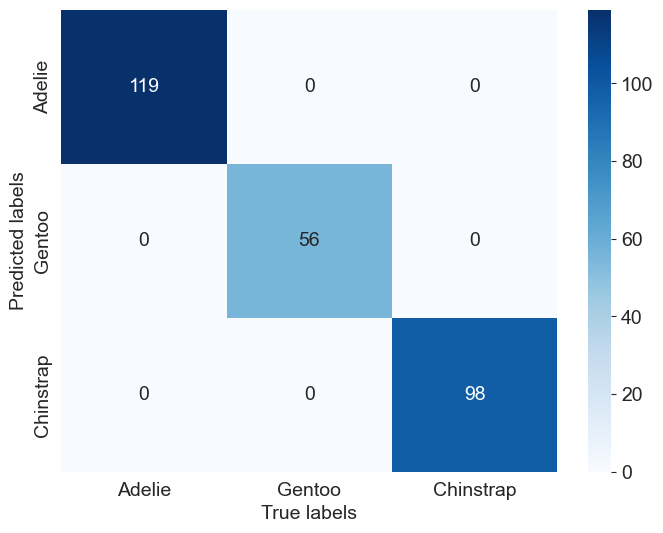

In [77]:
# Predict class probabilities and get predicted classes
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions, axis=-1)

# Extract ground truth classes
train_gt = np.argmax(y_train, axis=-1)

# Calculate and display training set accuracy
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy, 4)}')

# Calculate and display training set precision
train_precision = precision_score(train_gt, train_predictions, average='weighted')
print(f'Precision score over the train set: {round(train_precision, 4)}')

# Calculate and display training set recall
train_recall = recall_score(train_gt, train_predictions, average='weighted')
print(f'Recall score over the train set: {round(train_recall, 4)}')

# Calculate and display training set F1 score
train_f1 = f1_score(train_gt, train_predictions, average='weighted')
print(f'F1 score over the train set: {round(train_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(train_gt, train_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Adelie', 'Gentoo', 'Chinstrap'], yticklabels=['Adelie', 'Gentoo', 'Chinstrap'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the validation set: 1.0
Precision score over the validation set: 1.0
Recall score over the validation set: 1.0
F1 score over the validation set: 1.0


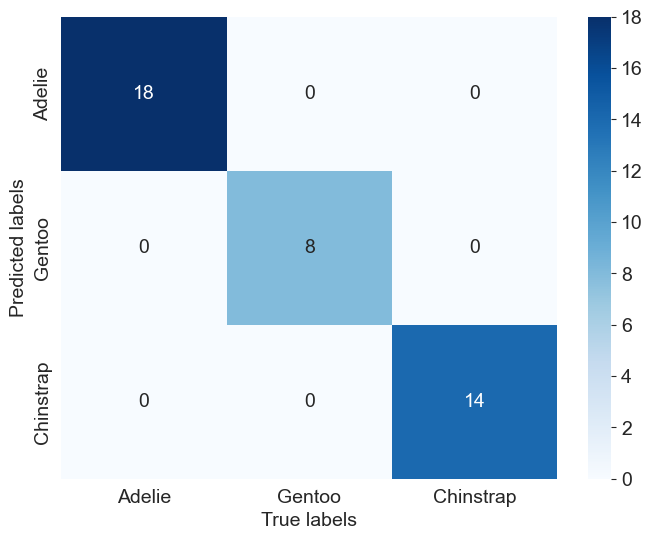

In [78]:
# Predict class probabilities and get predicted classes
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

# Extract ground truth classes
val_gt = np.argmax(y_val, axis=-1)

# Calculate and display validation set accuracy
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

# Calculate and display validation set precision
val_precision = precision_score(val_gt, val_predictions, average='weighted')
print(f'Precision score over the validation set: {round(val_precision, 4)}')

# Calculate and display validation set recall
val_recall = recall_score(val_gt, val_predictions, average='weighted')
print(f'Recall score over the validation set: {round(val_recall, 4)}')

# Calculate and display validation set F1 score
val_f1 = f1_score(val_gt, val_predictions, average='weighted')
print(f'F1 score over the validation set: {round(val_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(val_gt, val_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Adelie', 'Gentoo', 'Chinstrap'], yticklabels=['Adelie', 'Gentoo', 'Chinstrap'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the test set: 1.0
Precision score over the test set: 1.0
Recall score over the test set: 1.0
F1 score over the test set: 1.0


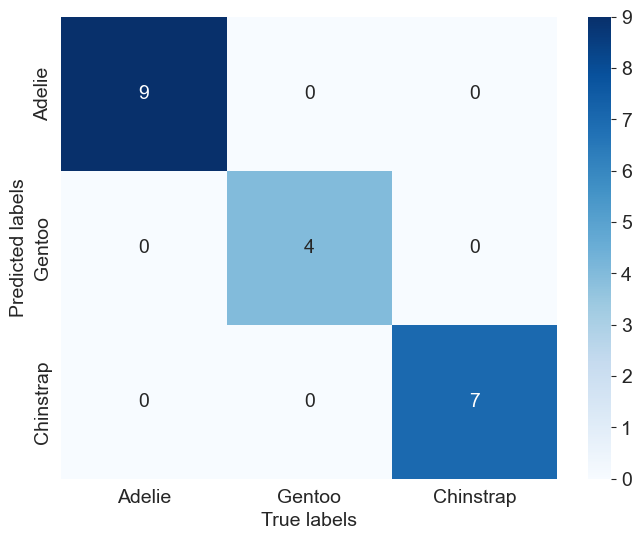

In [79]:
# Predict class probabilities and get predicted classes
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

# Extract ground truth classes
test_gt = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

# Calculate and display test set precision
test_precision = precision_score(test_gt, test_predictions, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')

# Calculate and display test set recall
test_recall = recall_score(test_gt, test_predictions, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')

# Calculate and display test set F1 score
test_f1 = f1_score(test_gt, test_predictions, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(test_gt, test_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Adelie', 'Gentoo', 'Chinstrap'], yticklabels=['Adelie', 'Gentoo', 'Chinstrap'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Eugenio Lomurno 📧 eugenio.lomurno@polimi.it





```
   Copyright 2024 Eugenio Lomurno

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```
